# LINEAR ALGEBRA - MINI PROJECT
***

### TOPIC:  Data Analytics + Prediction of animal traits using ANN and SVM,PCA
***
#### TEAM MEMBERS:
Sakshi Shetty, PES1201800190

Snigdha S Chenjeri, PES1201800045

Sruthy S, PES1201801143

**SECTION**: 4C
***

Importing all necessary libraries:

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import tensorflow
import matplotlib.pyplot as mpl
from sklearn import preprocessing as pre
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

Using TensorFlow backend.


Below is the dataset that describes and summarises our actual dataset:

In [2]:
summary = pd.read_csv("class.csv")
summary.head(8)

,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
0,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
1,2,20,Bird,"chicken, crow, dove, duck, flamingo, gull, haw..."
2,3,5,Reptile,"pitviper, seasnake, slowworm, tortoise, tuatara"
3,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
4,5,4,Amphibian,"frog, frog, newt, toad"
5,6,8,Bug,"flea, gnat, honeybee, housefly, ladybird, moth..."
6,7,10,Invertebrate,"clam, crab, crayfish, lobster, octopus, scorpi..."


***
Now we will load **the actual dataset that we will be working on** using the pandas library:

In [3]:
dataset = pd.read_csv("zoo-original.csv")
dataset.head(5)


,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


***
## PART 1: Data Analytics
Here, we will be perfoming operations on the dataset including preprocessing, cleaning, normalising and visualising to prepare the dataset for our next part - building a machine learning model based on neural networks. This will also help us better understand our dataset so that we can decide which columns we want to predict using our model.

***
Now, we will check for all the negative values in the dataset and replace them with zero:

In [4]:
num = dataset._get_numeric_data()
num[num < 0] = 0
dataset.head(5)

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


As you can see from comparing it to the original dataset, there are no longer any negative values.

***
Next, we will replace missing values and values which aren't numerical (NaN) with zero:

In [5]:
dataset = dataset.fillna(0)
dataset.head(5)

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


As you can see, there are no longer NaNs in the dataset since they have been replaced by zero.

***
#### GRAPH VISUALIZATION
**Note:** Refer to our ppt for detailed inferences on each one of the visualtions and graphs below.
***

In [6]:
#SETTING THE COLOUR THEME FOR THE GRAPHS

sns.set()
%matplotlib inline
pkmn_type_colors = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                   ]

***
#### Swarm Plot

Below is as warm plot that indicates how many venomous animals there for each type of animal based on whether they are a predator or not:

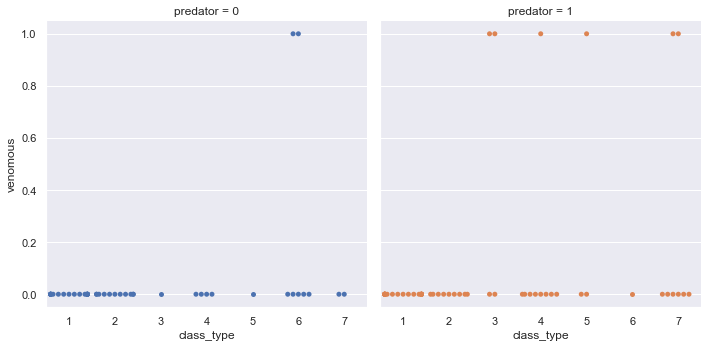

In [7]:
sns.set(rc={'figure.figsize':(30,30)})
sns.catplot(x = 'class_type', 
                   y = 'venomous', 
                   data = dataset, 
                   hue = 'predator',  # Color by stage
                   col = 'predator',  # Separate by stage
                   kind = 'swarm')   # Swarmplot

#DOUBLE TAP THE GRAPH TO ENLARGE AND SCROLL

***
**Pie Chart**
Below is a pie chart showing the percentage of animals belonging to each class:

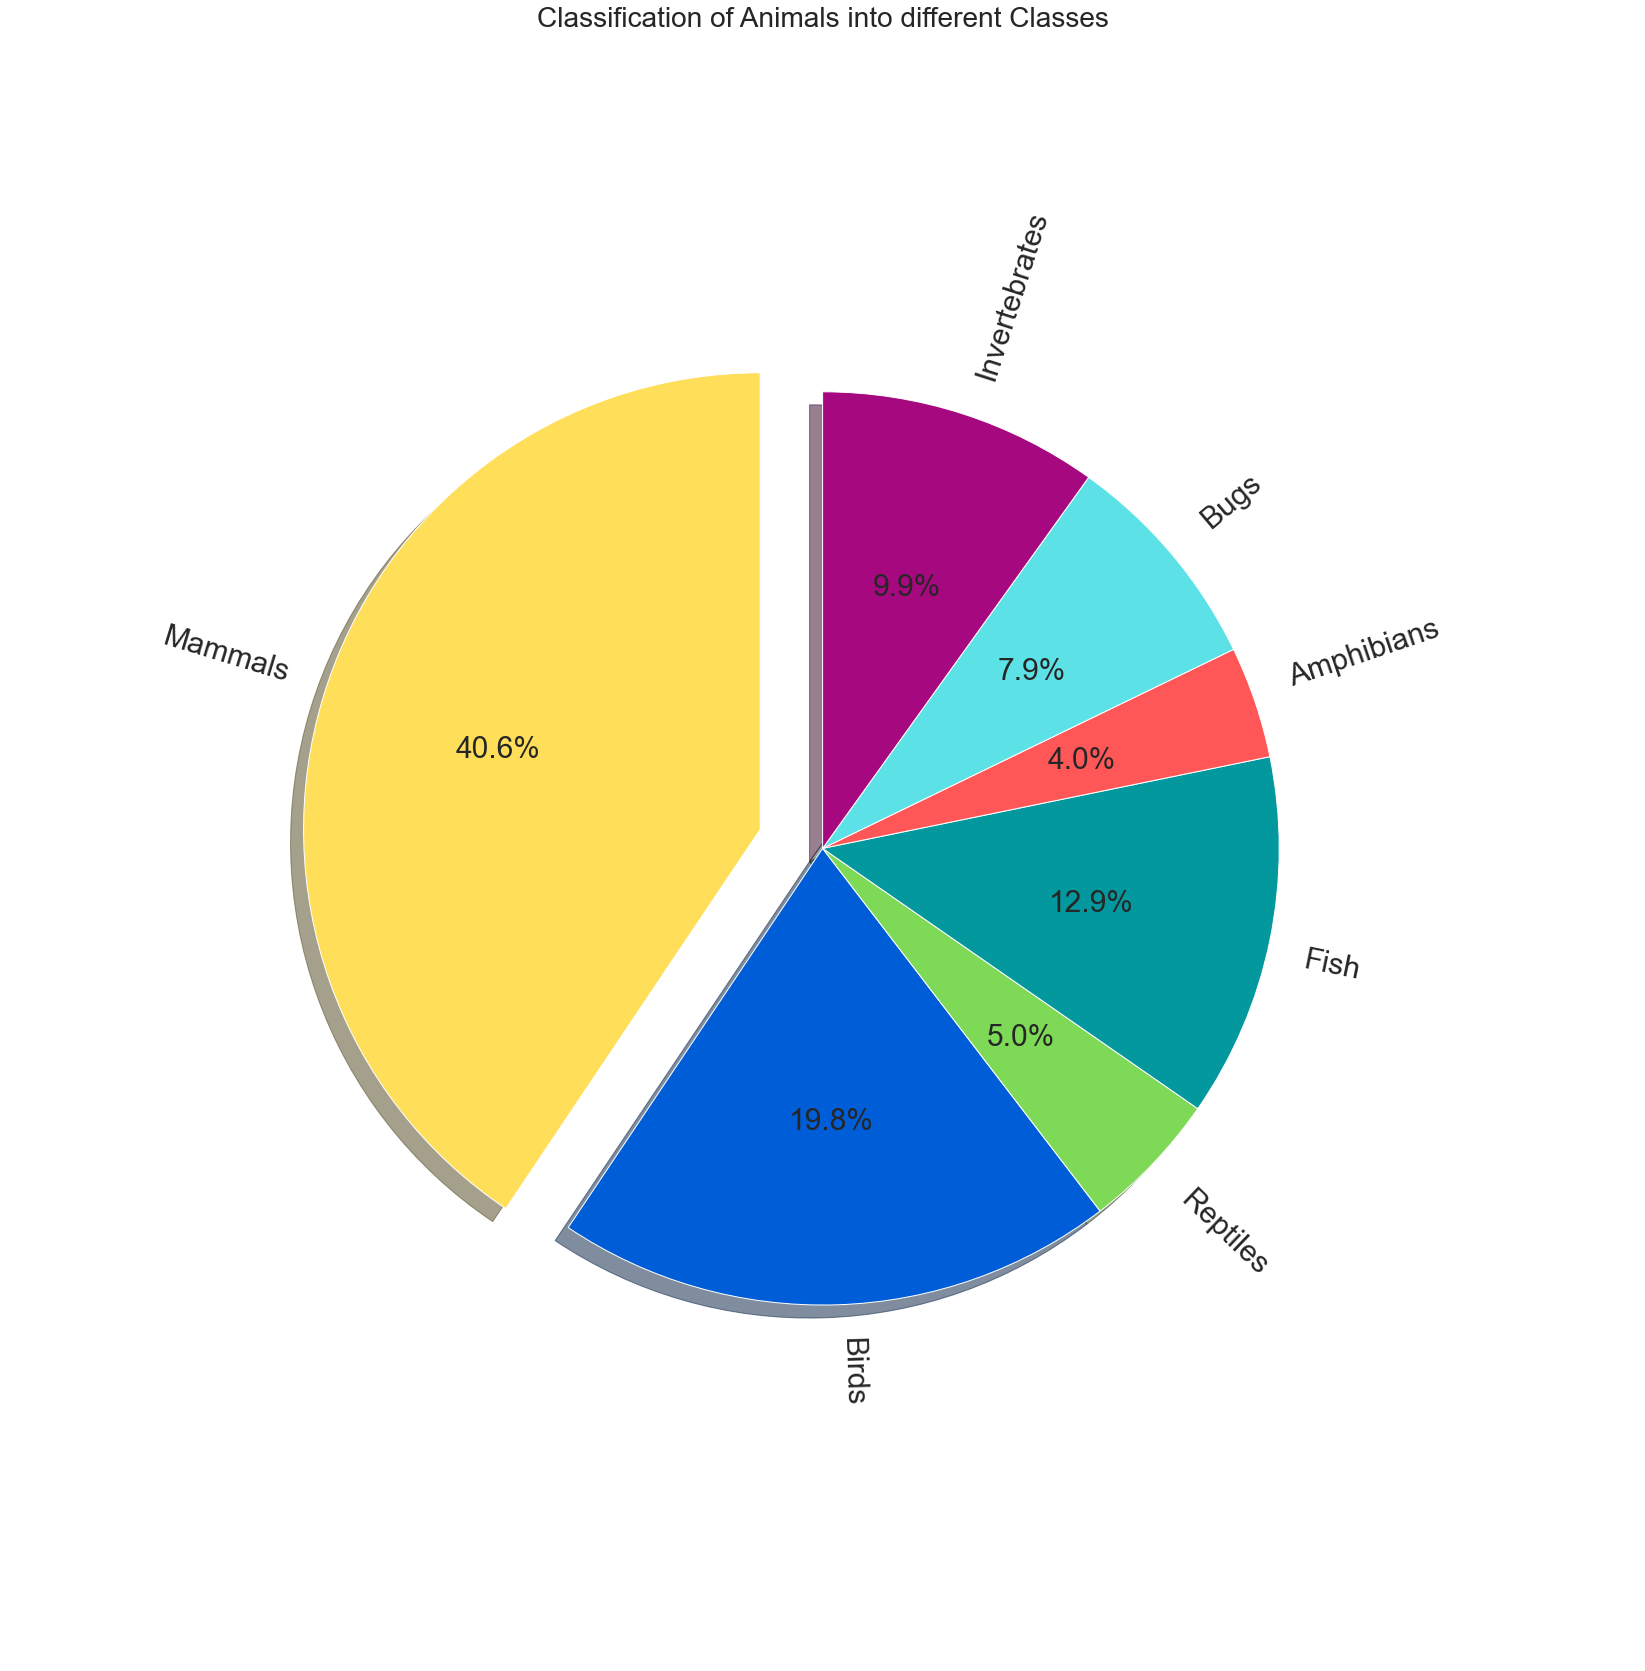

In [8]:
class1 = dataset.apply(lambda x: True if x['class_type'] == 1 else False , axis=1)
num_mammals = len(class1[class1 == True].index)

class2 = dataset.apply(lambda x: True if x['class_type'] == 2 else False , axis=1)
num_birds = len(class2[class2 == True].index)

class3 = dataset.apply(lambda x: True if x['class_type'] == 3 else False , axis=1)
num_reptiles = len(class3[class3 == True].index)

class4 = dataset.apply(lambda x: True if x['class_type'] == 4 else False , axis=1)
num_fish = len(class4[class4 == True].index)

class5 = dataset.apply(lambda x: True if x['class_type'] == 5 else False , axis=1)
num_amphibians = len(class5[class5 == True].index)

class6 = dataset.apply(lambda x: True if x['class_type'] == 6 else False , axis=1)
num_bugs = len(class6[class6 == True].index)

class7 = dataset.apply(lambda x: True if x['class_type'] == 7 else False , axis=1)
num_invertebrates = len(class7[class7 == True].index)

c = ['#ffde59','#005dd8','#7ed957','#03989e','#ff5757','#5ce1e6','#a6097f']
e = (0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0)

my_data = [num_mammals, num_birds, num_reptiles, num_fish, num_amphibians, num_bugs, num_invertebrates]
my_labels = 'Mammals','Birds','Reptiles','Fish','Amphibians','Bugs','Invertebrates'
mpl.pie(my_data, 
        labels = my_labels, 
        autopct='%1.1f%%',
        radius = 0.7,
        textprops={'fontsize': 30},
        startangle = 90,
        labeldistance = 1.07,
        shadow = True,
        colors = c,
        rotatelabels = True,
        explode = e
       )
mpl.title('Classification of Animals into different Classes',fontsize = 28)
#mpl.axis('scaled')
mpl.show()

***
#### Correlation Matrix
Below is a correlation matrix amongst relevant columns of the dataset:

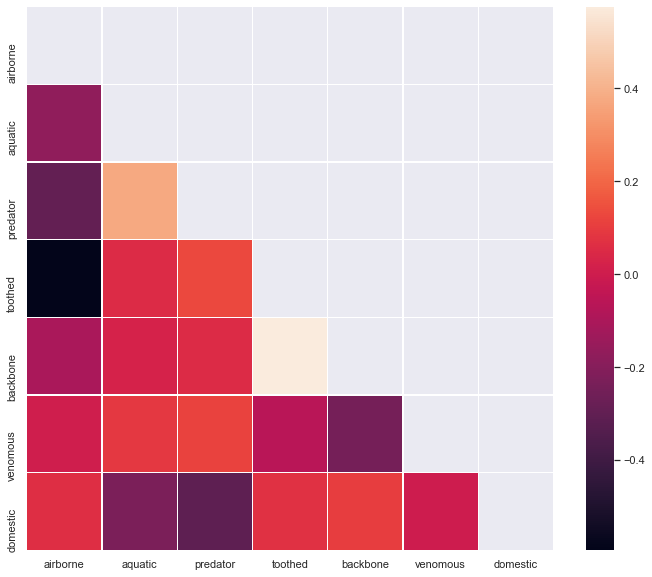

In [9]:
sns.set(rc={'figure.figsize':(11.8,10)})
df = dataset.drop(['hair','feathers','eggs','milk','breathes','fins','legs','tail','catsize','class_type'],axis=1)
cor_data = df
cor_matrix = cor_data.corr()
mask = np.triu(np.ones_like(cor_matrix, dtype=np.bool))
sns.heatmap(cor_matrix,mask=mask,linewidth=0.3)

(Note: As mentioned earlier, refer to ppt for our detailed inference from this matrix)
***

#### NORMALIZATION
Below is a normalised plot of the data

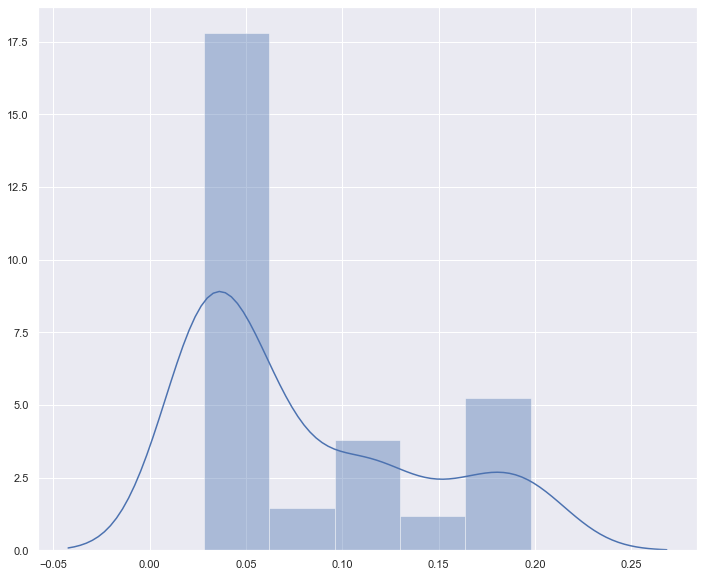

In [10]:
x_array = np.array(dataset['class_type'])
normalized_X = pre.normalize([x_array])

# Distribution Plot (a.k.a. Histogram)
sns.distplot(normalized_X)

***
## PART 2: Artificial Neural Networks
This part deals with the crux of our project - we will be using various activation methods to make three models - for predicting if the animals are venomous, predators and domestic and for checking the class type they belong to. For each model, we have used different activation methods so that we can compare their accuracy rates.
***

In [11]:
mldata = dataset.drop(columns=['animal_name']) #dropping the string column

### 1. Predicting if an animal is VENOMOUS:

In [12]:
seed = 42
np.random.seed(seed)

In [13]:
d1 = mldata.drop(columns=['venomous'])
t1 = mldata[['venomous']]
xtrain1 = d1[1: int(0.8*len(d1))]
ytrain1 = t1[1:int(0.8*len(t1))]

In [14]:
xtest1 = d1[int((0.8*len(d1))): ]
ytest1 = t1[int((0.8*len(d1))): ]

For this model, we will use **SIGMOID** as the primary activation method:

In [15]:
model1 = Sequential()
n = d1.shape[1]  #number of columns in training data

model1.add(Dense(250, activation='relu', input_shape=(n,)))
model1.add(Dense(250, activation='relu'))
model1.add(Dense(250, activation='relu'))
model1.add(Dense(2, activation='sigmoid'))
#accuracy seems to vary vastly based on the usage of sigmoid or relu or softmax
model1.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

In [16]:
model1.fit(xtrain1, ytrain1, epochs=10)

Epoch 1/10
79/79 [==============================] - 0s 3ms/step - loss: 0.5464 - accuracy: 0.9241
Epoch 2/10
79/79 [==============================] - 0s 152us/step - loss: 0.3565 - accuracy: 0.9241
Epoch 3/10
79/79 [==============================] - 0s 152us/step - loss: 0.3528 - accuracy: 0.9241
Epoch 4/10
79/79 [==============================] - 0s 101us/step - loss: 0.3173 - accuracy: 0.9241
Epoch 5/10
79/79 [==============================] - 0s 152us/step - loss: 0.2778 - accuracy: 0.9241
Epoch 6/10
79/79 [==============================] - 0s 101us/step - loss: 0.2347 - accuracy: 0.9241
Epoch 7/10
79/79 [==============================] - 0s 152us/step - loss: 0.2240 - accuracy: 0.9241
Epoch 8/10
79/79 [==============================] - 0s 304us/step - loss: 0.2014 - accuracy: 0.9241
Epoch 9/10
79/79 [==============================] - 0s 152us/step - loss: 0.1878 - accuracy: 0.9241
Epoch 10/10
79/79 [==============================] - 0s 152us/step - loss: 0.1840 - accuracy: 0.9241


**Overall accuracy:** displayed in the last epoch.

***
### 2. Predicting if an animal is a PREDATOR:

In [17]:
seed = 43
np.random.seed(seed)

In [18]:
d2 = mldata.drop(columns=['predator'])
t2 = mldata[['predator']]
xtrain2 = d2[1: int(0.8*len(d2))]
ytrain2 = t2[1:int(0.8*len(t2))]

In [19]:
xtest2 = d2[int((0.8*len(d2))): ]
ytest2 = t2[int((0.8*len(d2))): ]

For this model, we will use **SOFTMAX** as the primary activation method:

In [20]:
model2 = Sequential()
n = d2.shape[1]  #number of columns in training data

model2.add(Dense(250, activation='relu', input_shape=(n,)))
model2.add(Dense(250, activation='relu'))
model2.add(Dense(250, activation='relu'))
model2.add(Dense(2, activation='softmax'))
#accuracy seems to vary vastly based on the usage of sigmoid or relu or softmax
model2.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

In [21]:
model2.fit(xtrain2, ytrain2, epochs=10)

Epoch 1/10
79/79 [==============================] - 0s 2ms/step - loss: 0.6917 - accuracy: 0.5190
Epoch 2/10
79/79 [==============================] - 0s 152us/step - loss: 0.6319 - accuracy: 0.6076
Epoch 3/10
79/79 [==============================] - 0s 152us/step - loss: 0.6187 - accuracy: 0.6076
Epoch 4/10
79/79 [==============================] - 0s 152us/step - loss: 0.5833 - accuracy: 0.6962
Epoch 5/10
79/79 [==============================] - 0s 354us/step - loss: 0.5666 - accuracy: 0.6962
Epoch 6/10
79/79 [==============================] - 0s 152us/step - loss: 0.5695 - accuracy: 0.6582
Epoch 7/10
79/79 [==============================] - 0s 152us/step - loss: 0.5276 - accuracy: 0.7342
Epoch 8/10
79/79 [==============================] - 0s 101us/step - loss: 0.5251 - accuracy: 0.7215
Epoch 9/10
79/79 [==============================] - 0s 202us/step - loss: 0.5111 - accuracy: 0.7722
Epoch 10/10
79/79 [==============================] - 0s 152us/step - loss: 0.4757 - accuracy: 0.7722


**Overall accuracy:** displayed in the last epoch.

***
### 3. Predicting if an animal is DOMESTIC:

In [22]:
seed = 44
np.random.seed(seed)

In [23]:
d3 = mldata.drop(columns=['domestic'])
t3 = mldata[['domestic']]
xtrain3 = d3[1: int(0.8*len(d3))]
ytrain3 = t3[1:int(0.8*len(t3))]

In [24]:
xtest3 = d3[int((0.8*len(d3))): ]
ytest3 = t3[int((0.8*len(d3))): ]

For this model, we will use **TANH** as the primary activation method:

In [25]:
model3 = Sequential()
n = d3.shape[1]  #number of columns in training data

model3.add(Dense(250, activation='relu', input_shape=(n,)))
model3.add(Dense(250, activation='relu'))
model3.add(Dense(250, activation='relu'))
model3.add(Dense(2, activation='tanh'))
#accuracy seems to vary vastly based on the usage of sigmoid or relu or softmax
model3.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

In [26]:
model3.fit(xtrain3, ytrain3, epochs=10)

Epoch 1/10
79/79 [==============================] - 0s 2ms/step - loss: 0.6809 - accuracy: 0.5823
Epoch 2/10
79/79 [==============================] - 0s 152us/step - loss: 0.7085 - accuracy: 0.7215
Epoch 3/10
79/79 [==============================] - 0s 152us/step - loss: 0.6185 - accuracy: 0.8354
Epoch 4/10
79/79 [==============================] - 0s 152us/step - loss: 1.0884 - accuracy: 0.8354
Epoch 5/10
79/79 [==============================] - 0s 354us/step - loss: 1.3969 - accuracy: 0.8354
Epoch 6/10
79/79 [==============================] - 0s 101us/step - loss: 1.3960 - accuracy: 0.8354
Epoch 7/10
79/79 [==============================] - 0s 152us/step - loss: 1.3908 - accuracy: 0.8354
Epoch 8/10
79/79 [==============================] - 0s 152us/step - loss: 1.4054 - accuracy: 0.8354
Epoch 9/10
79/79 [==============================] - 0s 152us/step - loss: 1.4059 - accuracy: 0.8354
Epoch 10/10
79/79 [==============================] - 0s 152us/step - loss: 1.3831 - accuracy: 0.8354


**Overall accuracy:** displayed in the last epoch.
***

In conclusion, **sigmoid** function seems to result in the highest accuracy amongst the three activation functions used.
***

### 3. Predicting the CLASS TYPE of an animal:

In [27]:
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"]='2'

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

def label_encode(label):
    val = []
    if label=="1":
        val = [1,0,0,0,0,0,0]
    elif label=="2":
        val = [0,1,0,0,0,0,0]
    elif label=="3":
        val = [0,0,1,0,0,0,0]
    elif label=="4":
        val = [0,0,0,1,0,0,0]
    elif label=="5":
        val = [0,0,0,0,1,0,0]
    elif label=="6":
        val = [0,0,0,0,0,1,0]
    elif label=="7":
        val = [0,0,0,0,0,0,1]
    return val   
    
    
def data_encode(file):
	X = []
	Y = []
	train_file = open(file, 'r')
	for line in train_file.read().strip().split('\n'):
		line = line.split(',')
		X.append([line[1], line[2], line[3], line[4], line[5], line[6], line[7], line[8], line[9], line[10], line[11], line[12], line[13], line[14], line[15], line[16]])
		Y.append(label_encode(line[17]))
	return X, Y

#Define a Multilayer Perceptron Model
def model(x, weights, bias):
	layer_1 = tf.add(tf.matmul(x, weights["hidden"]), bias["hidden"])
	layer_1 = tf.nn.relu(layer_1)

	output_layer = tf.matmul(layer_1, weights["output"]) + bias["output"]
	return output_layer

#Define Training and Testing Data
train_X , train_Y = data_encode('zoo_train.csv')
test_X , test_Y = data_encode('zoo_test.csv')


#Parameters
learning_rate = 0.01
training_epochs = 100
display_steps = 1000


#Network parameters
n_input = 16
n_hidden = 10
n_output = 7

#Graph Nodes
X = tf.placeholder("float", [None, n_input])
Y = tf.placeholder("float", [None, n_output])
		
#Define Weights and Biases
weights = {"hidden" : tf.Variable(tf.random_normal([n_input, n_hidden]), name="weight_hidden"),
	       "output" : tf.Variable(tf.random_normal([n_hidden, n_output]), name="weight_output")}

bias = {"hidden" : tf.Variable(tf.random_normal([n_hidden]), name="bias_hidden"),
        "output" : tf.Variable(tf.random_normal([n_output]), name="bias_output")}	

#Define model
pred = model(X, weights, bias) 

#Define cost function and optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)

#Initialize global variables
init = tf.global_variables_initializer()

#Run the model
with tf.Session() as sess:
	sess.run(init)

	for epoch in range(training_epochs):
		_, c = sess.run([optimizer, cost], feed_dict={X: train_X, Y: train_Y})
		if(epoch + 1) % display_steps == 0:
			print ("Epoch: ", (epoch+1), "Cost: ", c)
	
	test_result = sess.run(pred, feed_dict={X: train_X})
	correct_pred = tf.equal(tf.argmax(test_result, 1), tf.argmax(train_Y, 1))

	accuracy = tf.reduce_mean(tf.cast(correct_pred, "float"))
	print ("Accuracy:", accuracy.eval({X: test_X, Y: test_Y}))

Instructions for updating:
non-resource variables are not supported in the long term
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

Accuracy: 0.9375


***
## PART 2: SVM and PCA approach
This is another approach at predicting data. However we will be using concepts of support vector machine and principal component analysis to predict values.
***

In [28]:
mldata = dataset.drop(columns=['animal_name']) #dropping the string column

***
### 3. Predicting if an animal is VENOMOUS:

In [31]:
d1 = mldata.drop(columns=['venomous'])
t1 = mldata[['venomous']]
xtrain1 = d1[1: int(0.8*len(d1))]
ytrain1 = t1[1:int(0.8*len(t1))]
xtest1 = d1[int((0.8*len(d1))): ]
ytest1 = t1[int((0.8*len(d1))): ]


In [34]:
sc = StandardScaler() #
X_train1 = sc.fit_transform(xtrain1)
X_test1 = sc.transform(xtest1)

pca = PCA(n_components= 2)
X_train1 = pca.fit_transform(X_train1)
X_test1 = pca.transform(X_test1)
#Printing few rows of X_train to show that the number of columns have now reduced to 2
print(X_train1[1:])

[[ 2.00809858  3.60130047]
 [-2.39493049 -0.27667104]
 [-2.75216415  0.07836151]
 [-2.8722492  -0.43271526]
 [-3.12252695 -0.82772163]
 [ 1.63773577  2.69521734]
 [ 2.00809858  3.60130047]
 [-2.16112106 -1.32157971]
 [-2.75216415  0.07836151]
 [ 1.45001517 -2.34576084]
 [ 2.00809858  3.60130047]
 [ 3.51261166  0.08672784]
 [ 3.78738372  0.14297783]
 [ 3.71661704 -0.21291436]
 [ 1.82037797 -1.43967771]
 [-2.8722492  -0.43271526]
 [ 1.40392635  3.74012601]
 [-1.26932914  2.96323647]
 [ 1.45001517 -2.34576084]
 [ 2.11659835 -1.18272011]
 [-2.8722492  -0.43271526]
 [ 1.09612069 -1.81192894]
 [ 2.45117548 -2.3211553 ]
 [ 1.64427634  0.52356263]
 [ 1.64427634  0.52356263]
 [-1.78291285 -0.99024667]
 [-2.8722492  -0.43271526]
 [-2.57444156 -0.31578522]
 [ 2.86557291 -3.09575336]
 [-3.12252695 -0.82772163]
 [-2.44424885 -0.43185562]
 [ 2.2366834  -0.67164335]
 [ 1.88801353  3.0902237 ]
 [-2.51835473 -0.96654716]
 [-2.26807697 -0.5715408 ]
 [ 1.82037797 -1.43967771]
 [ 2.00809858  3.60130047]
 

In [113]:
classifier1 = SVC(kernel='rbf', random_state = 1) 
classifier1.fit(X_train1,ytrain1)
Y_pred1 = classifier.predict(X_test1)
cm = confusion_matrix(ytest1,Y_pred1)
accuracy = float(cm.diagonal().sum())/len(ytest1)
print("\nAccuracy of SVM+PCA on predicting if animal is venomous : ", accuracy)
print("\n Confusion Matrix:\n",cm)



Accuracy of SVM+PCA on predicting if animal is venomous :  0.9047619047619048

 Confusion Matrix:
 [[19  0]
 [ 2  0]]


***
### 3. Predicting if an animal is a PREDATOR:

In [105]:
d2 = mldata.drop(columns=['predator'])
t2 = mldata[['predator']]
xtrain2 = d2[1: int(0.8*len(d2))]
ytrain2 = t2[1:int(0.8*len(t2))]
xtest2 = d2[int((0.8*len(d2))): ]
ytest2 = t2[int((0.8*len(d2))): ]

In [106]:
sc = StandardScaler()
X_train2 = sc.fit_transform(xtrain2)
X_test2 = sc.transform(xtest2)

pca = PCA(n_components= 2)
X_train2 = pca.fit_transform(X_train2)
X_test2 = pca.transform(X_test2)


In [114]:
classifier2 = SVC(kernel='rbf', random_state = 1) 
classifier2.fit(X_train2,ytrain2)
Y_pred2 = classifier.predict(X_test2)
cm = confusion_matrix(ytest2,Y_pred2)
accuracy = float(cm.diagonal().sum())/len(ytest2)
print("\nAccuracy of SVM+PCA on predicting if animal is predatory : ", accuracy)
print("\n Confusion Matrix:\n",cm)



Accuracy of SVM+PCA on predicting if animal is predatory :  0.6666666666666666

 Confusion Matrix:
 [[14  0]
 [ 7  0]]


***
### 3. Predicting if an animal is DOMESTIC:

In [108]:
d3 = mldata.drop(columns=['domestic'])
t3 = mldata[['domestic']]
xtrain3 = d3[1: int(0.8*len(d3))]
ytrain3 = t3[1:int(0.8*len(t3))]
xtest3 = d3[int((0.8*len(d3))): ]
ytest3 = t3[int((0.8*len(d3))): ]

In [109]:
sc = StandardScaler()
X_train3 = sc.fit_transform(xtrain3)
X_test3 = sc.transform(xtest3)

pca = PCA(n_components= 2)
X_train3 = pca.fit_transform(X_train3)
X_test3 = pca.transform(X_test3)


In [115]:
classifier3 = SVC(kernel='rbf', random_state = 1) 
classifier3.fit(X_train3,ytrain3)
Y_pred3 = classifier.predict(X_test3)
cm = confusion_matrix(ytest3,Y_pred3)
accuracy = float(cm.diagonal().sum())/len(ytest3)
print("\nAccuracy of SVM+PCA on predicting if animal is domestic : ", accuracy)
print("\n Confusion Matrix:\n",cm)


Accuracy of SVM+PCA on predicting if animal is domestic :  1.0

 Confusion Matrix:
 [[21]]
